In [1]:
##Do the Necessary Imports
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
##First for Understanding purpose,we'll do th whole process on a single frame .
##Then we'll use the whole thing to work on a video which is nothing but a set of frames.

In [4]:
##Read in the Image

img = cv2.imread("road.jpg")
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

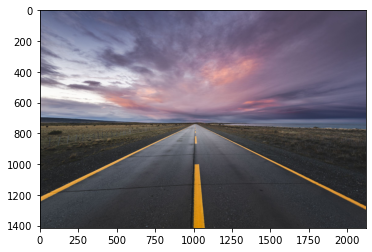

In [5]:
##Check the image
plt.imshow(img)

In [6]:
##Let's have a look at the actual shape
img.shape

(1414, 2119, 3)

In [9]:
## Now we need to locate vertices to create the mask

vertices = np.array([ [0 , img.shape[0]] , [img.shape[1] , img.shape[0]] , [1000,600] ] , np.int32)


In [10]:
vertices

array([[   0, 1414],
       [2119, 1414],
       [1000,  600]])

In [12]:
## Create a black mask
mask = np.zeros_like(img_gray)
mask.shape

(1414, 2119)

In [13]:
##Now we'll color the mask according to the vertices that we located earlier

cv2.fillPoly(mask , [vertices] , (255))

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

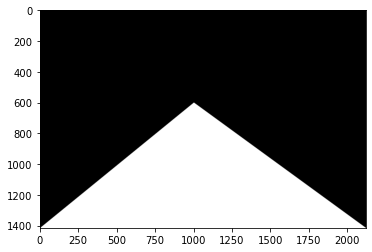

In [14]:
##This is how it would look like after coloring
plt.imshow(mask , cmap = 'gray')

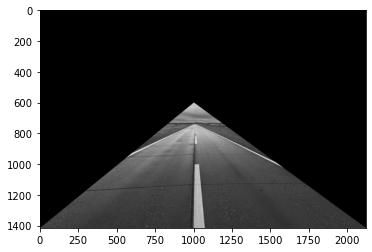

In [15]:
##Now we'll create a region of interest by Bitwise-ANDing the grayscale image and the mask
roi = cv2.bitwise_and(mask , img_gray , mask)
plt.imshow(roi , cmap = 'gray')

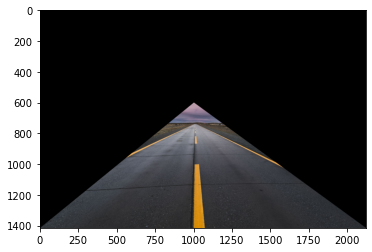

In [16]:
##Now let's check how it would look like if we create a mask for the original 3 channeled image rather than the grayscale

img = cv2.imread("road.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
vertices = np.array([ [0 , img.shape[0]] , [img.shape[1] , img.shape[0]] , [1000,600] ] , np.int32)
mask = np.zeros_like(img)

cv2.fillPoly(mask , [vertices] , (255,255,255))
roi = cv2.bitwise_and(mask , img , mask)
plt.imshow(mask)

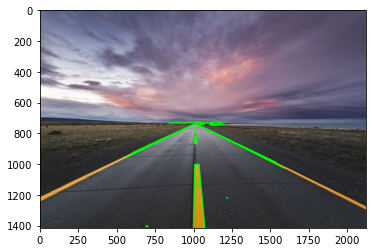

In [17]:
##To put it all in one place

##Read in the Image
img = cv2.imread("road.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

## Apply Gaussian Blur to the image to remove the excessive noise
blurred_img = cv2.GaussianBlur(img , (5,5) , 0)

## Apply Canny Edge Detector the blurred imsge
th1 = min(np.median(blurred_img)*0.7 , 0)
th2 = max(255 , np.median(blurred_img)*1.3)
edges = cv2.Canny(blurred_img , th1 , th2)

## Create the Mask using vertices
vertices = np.array([ [0 , img.shape[0]] , [img.shape[1] , img.shape[0]] , [1000,600] ] , np.int32)
mask = np.zeros_like(edges)

##Create region of interst
cv2.fillPoly(mask , [vertices] , (255,255,255))
roi = cv2.bitwise_and(mask , edges , mask)

##Apply Hough Transformation
lines = cv2.HoughLinesP(roi , 100 , np.pi/180 , 1)

## Draw the Lines
for line in lines :
    for x1,y1,x2,y2 in line : 
        cv2.line(img , (x1,y1) , (x2,y2) , (0,255,0) , 7)
        
plt.imshow(img)

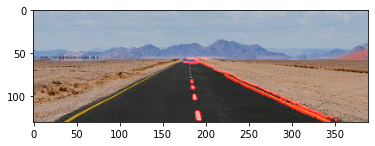

In [2]:
## We'll try it on another image before heading into the main video

img = cv2.imread("road2.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
blurred_img = cv2.GaussianBlur(img , (5,5) , 0)
plt.imshow(blurred_img)
th1 = min(np.median(blurred_img)*0.7 , 0)
th2 = max(255 , np.median(blurred_img)*1.3)
edges = cv2.Canny(blurred_img , th1 , th2)
plt.imshow(edges , cmap = 'gray')

vertices = np.array([ [50 , img.shape[0]] , [360 , img.shape[0]] , [190,50] ] , np.int32)
mask = np.zeros_like(edges)

cv2.fillPoly(mask , [vertices] , (255,255,255))
roi = cv2.bitwise_and(mask , edges , mask)

lines = cv2.HoughLinesP(roi , 1 , np.pi/180 , 4)

trace = np.zeros_like(img)
for line in lines :
    for x1,y1,x2,y2 in line :
        
        cv2.line(trace , (x1,y1) , (x2,y2) , (255,0,0) , 2)
        detected = cv2.addWeighted(img , 0.8 , trace , 1 , 0)
        
plt.imshow(detected)

In [1]:
##Now we'll apply this to the whole video

import cv2 
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture("f1.mp4")

while True :
    ret , img = cap.read()
    
    if ret == True :

    
        blurred_img = cv2.GaussianBlur(img , (5,5) , 0)
        blurred_img = cv2.cvtColor(blurred_img , cv2.COLOR_RGB2GRAY)
        
        th1 = min(np.median(blurred_img)*0.7 , 0)
        th2 = max(255 , np.median(blurred_img)*1.3)
        edges = cv2.Canny(blurred_img , th1 , th2)
        

        vertices = np.array([ [0,img.shape[0]] , [100,140] , [550,140] , [ img.shape[1] , img.shape[0]] , [ img.shape[1] , 80] ,   [380,50] ,
                    [260,50] , [0,80] ], np.int32)
        mask = np.zeros_like(edges)
        
        cv2.fillPoly(mask , [vertices] , (255,255,255))
        roi = cv2.bitwise_and(mask , edges , mask)
        
        lines = cv2.HoughLinesP(roi , 2 , np.pi/180 , 40 ,  minLineLength = 100 , maxLineGap = 50)
        
        if lines is not None : 

            for line in lines :
                for x1,y1,x2,y2 in line : 
                    cv2.line(img , (x1,y1) , (x2,y2) , (0,255,) , 2)
                    #cv2.fillPoly(img , [])
            time.sleep(1/30)
            cv2.imshow("img" , img)

            if cv2.waitKey(1) & 0xFF == 27 :
                break
            
        

    else :
        break
    
cap.release()
cv2.destroyAllWindows()

    #plt.imshow(img)

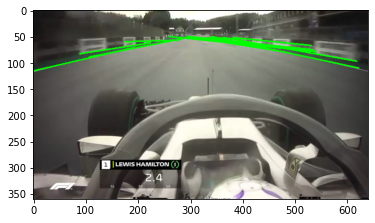

In [3]:
##One of the Frames from the video after processing

plt.imshow(img)